In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the train dataset
titanic_df = pd.read_csv("C:\\Users\\sreel\\OneDrive\\Desktop\\Project\\Prodigy Task 2\\Titanic-Dataset.csv")

In [7]:
# Displaying basic info
print("Dataset Information:")
titanic_df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# Displaying the first ten rows
print("\nFirst 10 rows:")
titanic_df.head(10)


First 10 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
# Checking for missing values in the dataset
print("\nMissing values in the dataset:")
titanic_df.isnull().sum()


Missing values in the dataset:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Droping columns that are less useful for analysis ('PassengerId', 'Name', 'Ticket', 'Cabin')
titanic_cleaned = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [15]:
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [16]:
# Handling missing values: fill 'Age' with median and 'Embarked' with mode
titanic_cleaned['Age'].fillna(titanic_cleaned['Age'].median(), inplace=True)
titanic_cleaned['Embarked'].fillna(titanic_cleaned['Embarked'].mode()[0], inplace=True)

In [17]:
# Displaying summary statistics
print("\nSummary statistics:")
titanic_cleaned.describe()


Summary statistics:


,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Exploratory Data Analysis

In [20]:
# Survival rate by gender
print("\nSurvival rate by gender:")
titanic_cleaned.groupby('Sex')['Survived'].mean()


Survival rate by gender:


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

C:\Users\sreel\OneDrive\Documents\Python Scripts\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


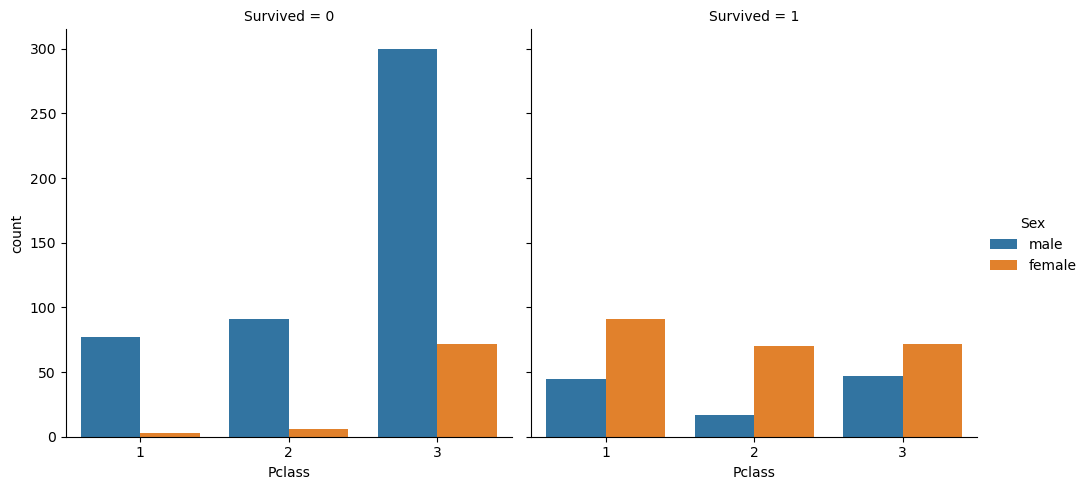

In [21]:
# Ploting survival by class and gender
sns.catplot(x='Pclass', hue='Sex', col='Survived', data=titanic_cleaned, kind='count')
plt.show()

C:\Users\sreel\AppData\Local\Temp\ipykernel_17180\4093557038.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic_cleaned.corr(), annot=True, cmap='coolwarm')


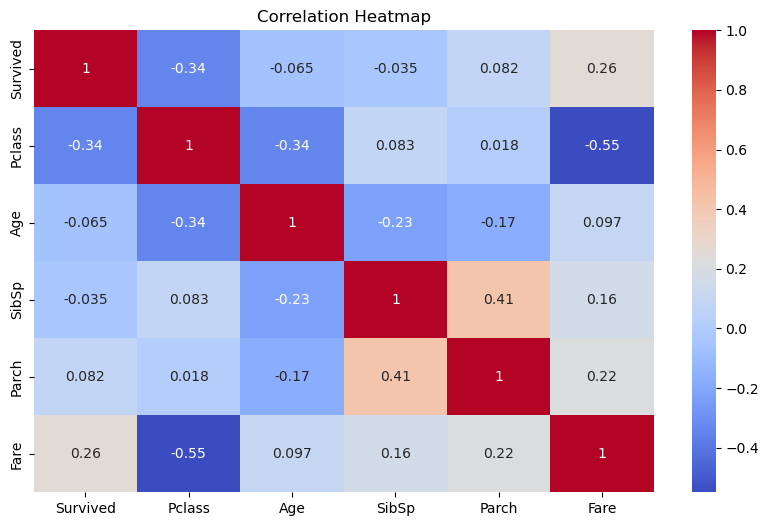

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic_cleaned.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

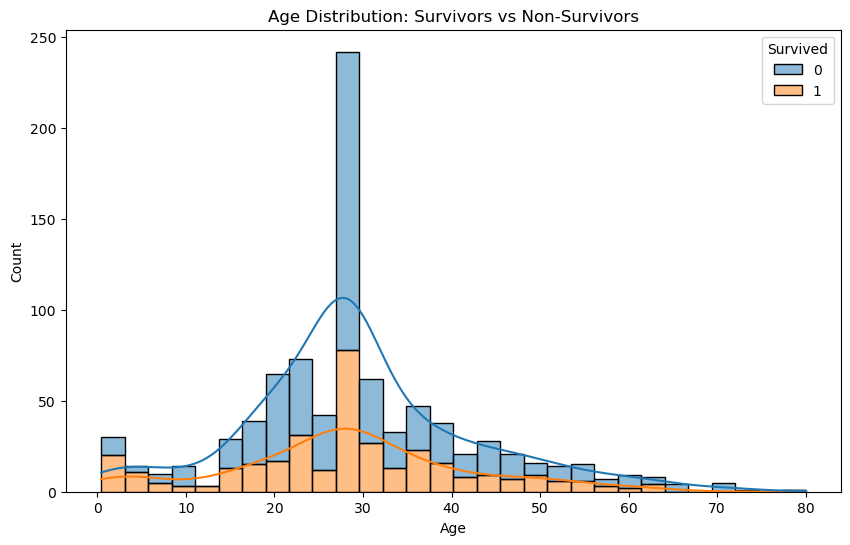

In [23]:
# Age distribution of survivors vs non-survivors
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_cleaned, x='Age', hue='Survived', multiple='stack', kde=True)
plt.title('Age Distribution: Survivors vs Non-Survivors')
plt.show()